In [18]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import LinearRegression





In [19]:
#data reading
df=pd.read_csv("/content/drive/MyDrive/Datasets/Tetuan City power consumption.csv")
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


#Data Cleaning

In [20]:
print(f"The dataset have {df.shape[1]} rows and {df.shape[0]} features")

The dataset have 9 rows and 52416 features


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [22]:
df.isna().sum()

DateTime                     0
Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64

there's no missing value just need to change the datetime column into appropriate format

In [23]:
df['DateTime']=pd.to_datetime(df['DateTime'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DateTime                   52416 non-null  datetime64[ns]
 1   Temperature                52416 non-null  float64       
 2   Humidity                   52416 non-null  float64       
 3   Wind Speed                 52416 non-null  float64       
 4   general diffuse flows      52416 non-null  float64       
 5   diffuse flows              52416 non-null  float64       
 6   Zone 1 Power Consumption   52416 non-null  float64       
 7   Zone 2  Power Consumption  52416 non-null  float64       
 8   Zone 3  Power Consumption  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


renamed the regions first region is Quads, second one is Boussafu and Smir last one

In [25]:
df.rename(columns={"Zone 1 Power Consumption":"Quads",'Zone 2  Power Consumption':"Boussafu",'Zone 3  Power Consumption':"Smir"},inplace=True)

In [26]:
df['day'] = df['DateTime'].dt.day
df['day_of_week'] = df['DateTime'].dt.dayofweek  # Monday is 0 and Sunday is 6
df['day_of_year'] = df['DateTime'].dt.dayofyear
df['hour'] = df['DateTime'].dt.hour
df['minute'] = df['DateTime'].dt.minute
df['month'] = df['DateTime'].dt.month
df['quarter'] = df['DateTime'].dt.quarter
df['week'] = df['DateTime'].dt.isocalendar().week
df['week_of_year'] = df['DateTime'].dt.week

<ipython-input-26-2399e657d76a>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week_of_year'] = df['DateTime'].dt.week


In [27]:
df.set_index("DateTime",inplace=True)

In [28]:
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Quads,Boussafu,Smir,day,day_of_week,day_of_year,hour,minute,month,quarter,week,week_of_year
DateTime,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,1,6,1,0,0,1,1,52,52
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,1,6,1,0,10,1,1,52,52
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,1,6,1,0,20,1,1,52,52
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,1,6,1,0,30,1,1,52,52
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,1,6,1,0,40,1,1,52,52


#Outliers checking

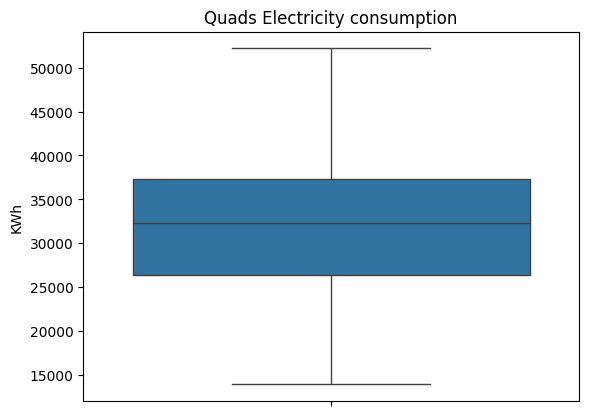

In [39]:
sns.boxplot(df['Quads'])
plt.ylabel("KWh")
plt.title("Quads Electricity consumption")
plt.show()

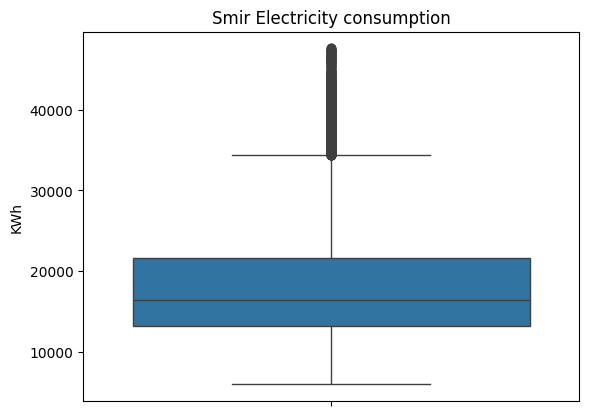

In [40]:
sns.boxplot(df['Smir'])
plt.ylabel("KWh")
plt.title("Smir Electricity consumption")
plt.show()

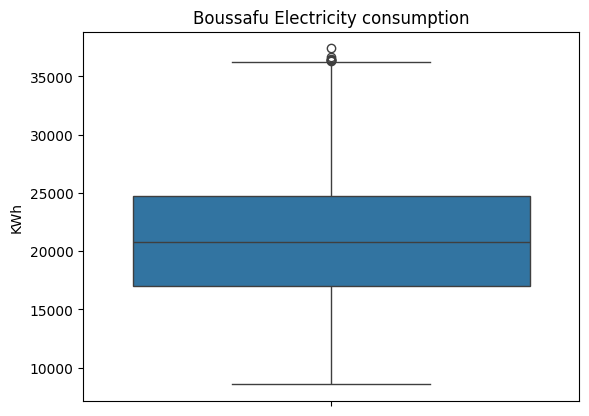

In [41]:
sns.boxplot(df['Boussafu'])
plt.ylabel("KWh")
plt.title("Boussafu Electricity consumption")
plt.show()

In [42]:
df = df[(df['Smir'] <= 35000) & (df['Boussafu'] <= 35000)]


#Stationarity

In [45]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

time_series_data = df['Quads']


result = adfuller(time_series_data)


print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] <= 0.05:
    print("Reject the null hypothesis - The data is stationary.")
else:
    print("Fail to reject the null hypothesis - The data is non-stationary.")


ADF Statistic: -37.060825384600506
p-value: 0.0
Critical Values: {'1%': -3.430477550221914, '5%': -2.861596374609351, '10%': -2.5668000063347174}
Reject the null hypothesis - The data is stationary.


#Normalization

In [48]:
df_normalized=df.copy()
datetime_columns = ['day_of_year',"hour",'minute', 'month', 'quarter', 'week','week_of_year','day', 'day_of_week',]
df_datetime = df_normalized[datetime_columns]
df_normalized = df_normalized.drop(columns=datetime_columns)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the remaining columns
df_normalized[df_normalized.columns] = scaler.fit_transform(df_normalized[df_normalized.columns])

# Add the DateTime columns back to the normalized DataFrame
df_normalized = pd.concat([df_datetime, df_normalized], axis=1)

# Display the normalized DataFrame
df_normalized.head()

,day_of_year,hour,minute,month,quarter,week,week_of_year,day,day_of_week,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Quads,Boussafu,Smir
DateTime,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,1,0,0,1,1,52,52,1,6,0.090091,0.748382,0.005130,0.000040,0.000115,0.561382,0.286320,0.492206
2017-01-01 00:10:00,1,0,10,1,1,52,52,1,6,0.086146,0.756770,0.005130,0.000057,0.000079,0.443286,0.409121,0.488425
2017-01-01 00:20:00,1,0,20,1,1,52,52,1,6,0.083399,0.756770,0.004663,0.000050,0.000095,0.424167,0.395185,0.472507
2017-01-01 00:30:00,1,0,30,1,1,52,52,1,6,0.078176,0.762761,0.005130,0.000075,0.000091,0.399126,0.370763,0.446044
2017-01-01 00:40:00,1,0,40,1,1,52,52,1,6,0.072736,0.771148,0.004819,0.000038,0.000079,0.374255,0.352274,0.430325


#Multicolinearlity

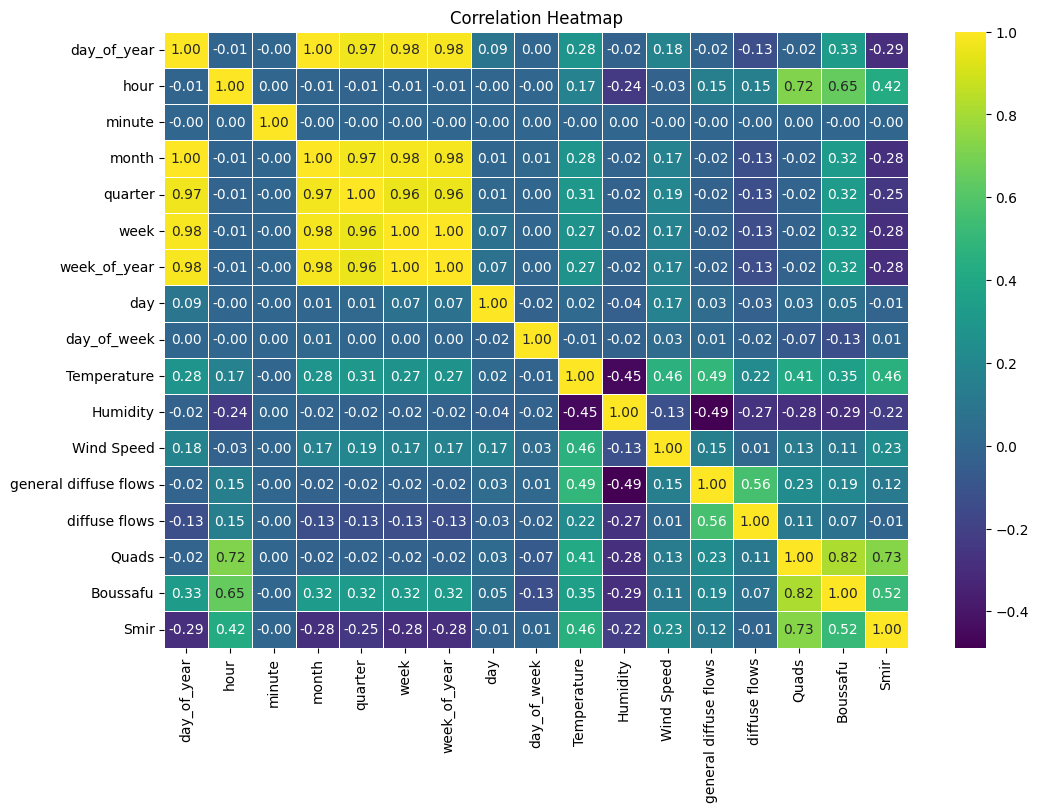

In [49]:
correlation_matrix=df_normalized.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [50]:
df_normalized.columns

Index(['day_of_year', 'hour', 'minute', 'month', 'quarter', 'week',
       'week_of_year', 'day', 'day_of_week', 'Temperature', 'Humidity',
       'Wind Speed', 'general diffuse flows', 'diffuse flows', 'Quads',
       'Boussafu', 'Smir'],
      dtype='object')

In [51]:
df_normalized.drop(columns=["diffuse flows","Boussafu","Smir"],inplace=True)

In [52]:
df_normalized.head()

,day_of_year,hour,minute,month,quarter,week,week_of_year,day,day_of_week,Temperature,Humidity,Wind Speed,general diffuse flows,Quads
DateTime,,,,,,,,,,,,,,
2017-01-01 00:00:00,1,0,0,1,1,52,52,1,6,0.090091,0.748382,0.005130,0.000040,0.561382
2017-01-01 00:10:00,1,0,10,1,1,52,52,1,6,0.086146,0.756770,0.005130,0.000057,0.443286
2017-01-01 00:20:00,1,0,20,1,1,52,52,1,6,0.083399,0.756770,0.004663,0.000050,0.424167
2017-01-01 00:30:00,1,0,30,1,1,52,52,1,6,0.078176,0.762761,0.005130,0.000075,0.399126
2017-01-01 00:40:00,1,0,40,1,1,52,52,1,6,0.072736,0.771148,0.004819,0.000038,0.374255


#EDA

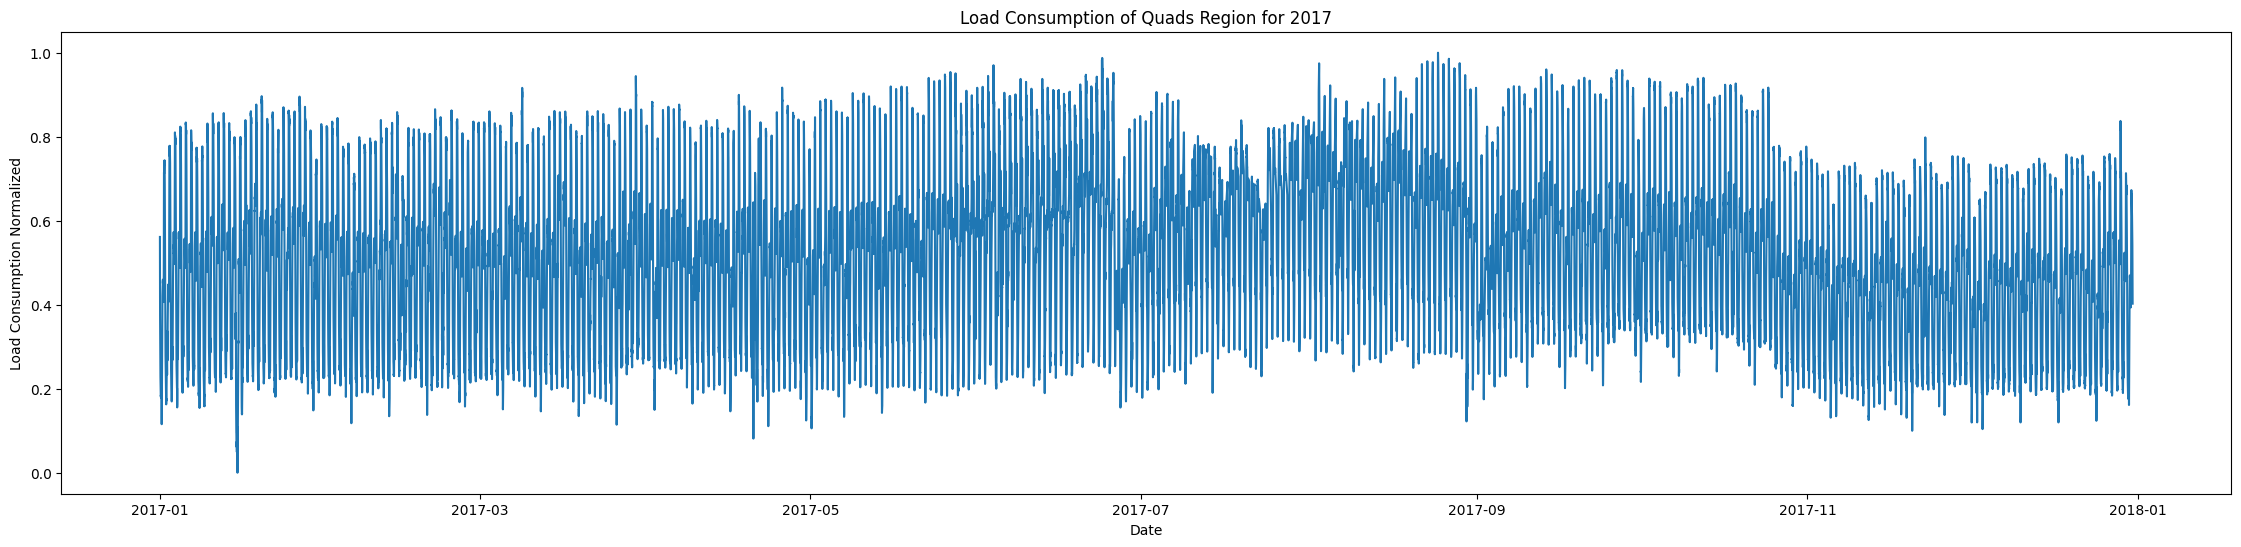

In [57]:
plt.figure(figsize=(28,6))
plt.plot(df_normalized.index, df_normalized['Quads'])
plt.xlabel("Date")
plt.ylabel("Load Consumption Normalized")
plt.title("Load Consumption of Quads Region for 2017")
plt.show()

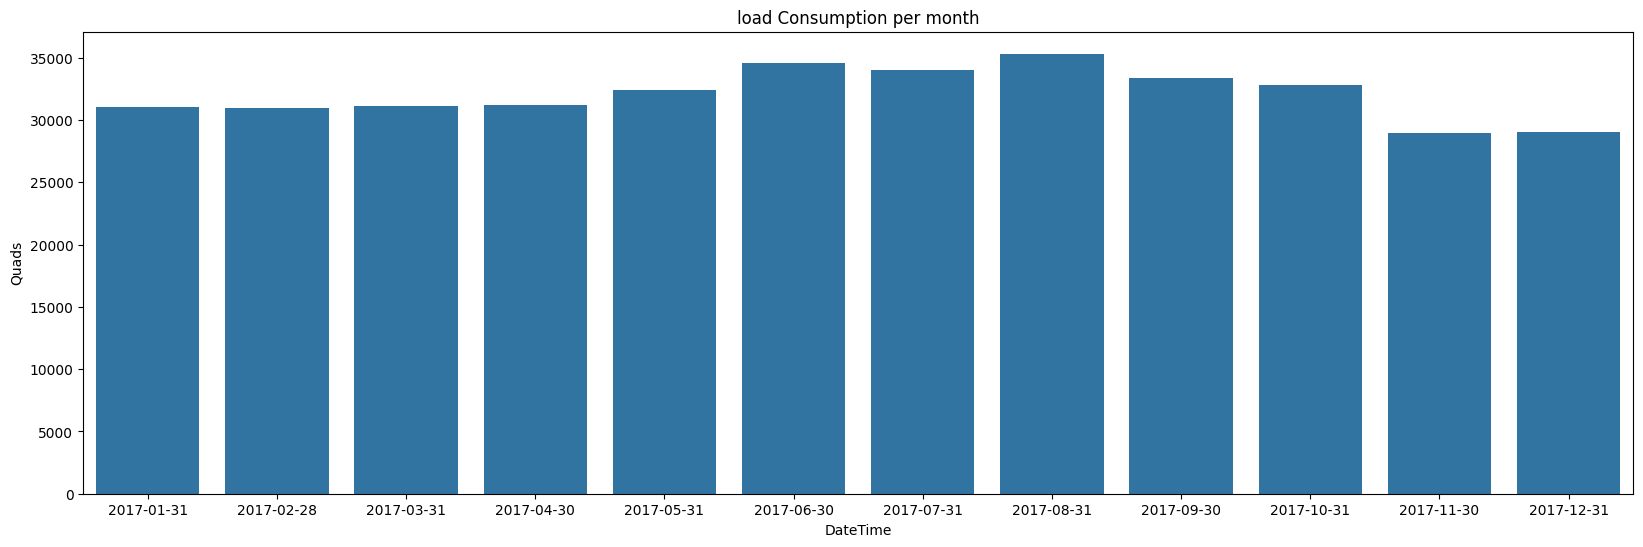

In [75]:
mean_by_month = df.resample('M').mean()
plt.figure(figsize=(20,6))
sns.barplot(x='DateTime', y='Quads', data=mean_by_month)
plt.title("load Consumption per month")
plt.show()

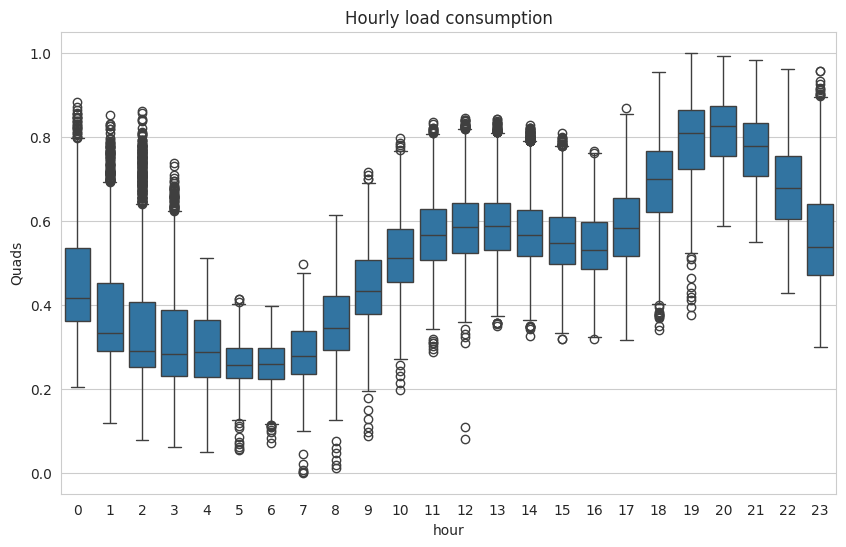

In [78]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.boxplot(x='hour', y='Quads', data=df_normalized)
plt.title('Hourly load consumption')

plt.show()

#Machine learning Modelling

In [ ]:
df_quads=df.copy()
df_quads.drop(columns=["DateTime","Temperature","Humidity","Wind Speed","general diffuse flows","diffuse flows","Boussafu","Smir"],inplace=True)
df_quads.head()

,Quads,day,day_of_week,day_of_year,hour,minute,month,quarter,week,week_of_year
0,34055.69620,1,6,1,0,0,1,1,52,52
1,29814.68354,1,6,1,0,10,1,1,52,52
2,29128.10127,1,6,1,0,20,1,1,52,52
3,28228.86076,1,6,1,0,30,1,1,52,52
4,27335.69620,1,6,1,0,40,1,1,52,52


#Plotting

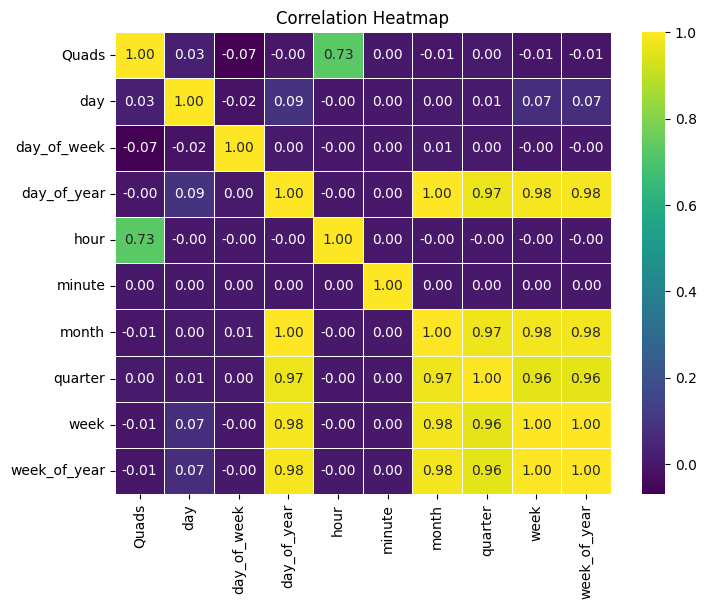

In [ ]:
correlation_matrix=df_quads.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

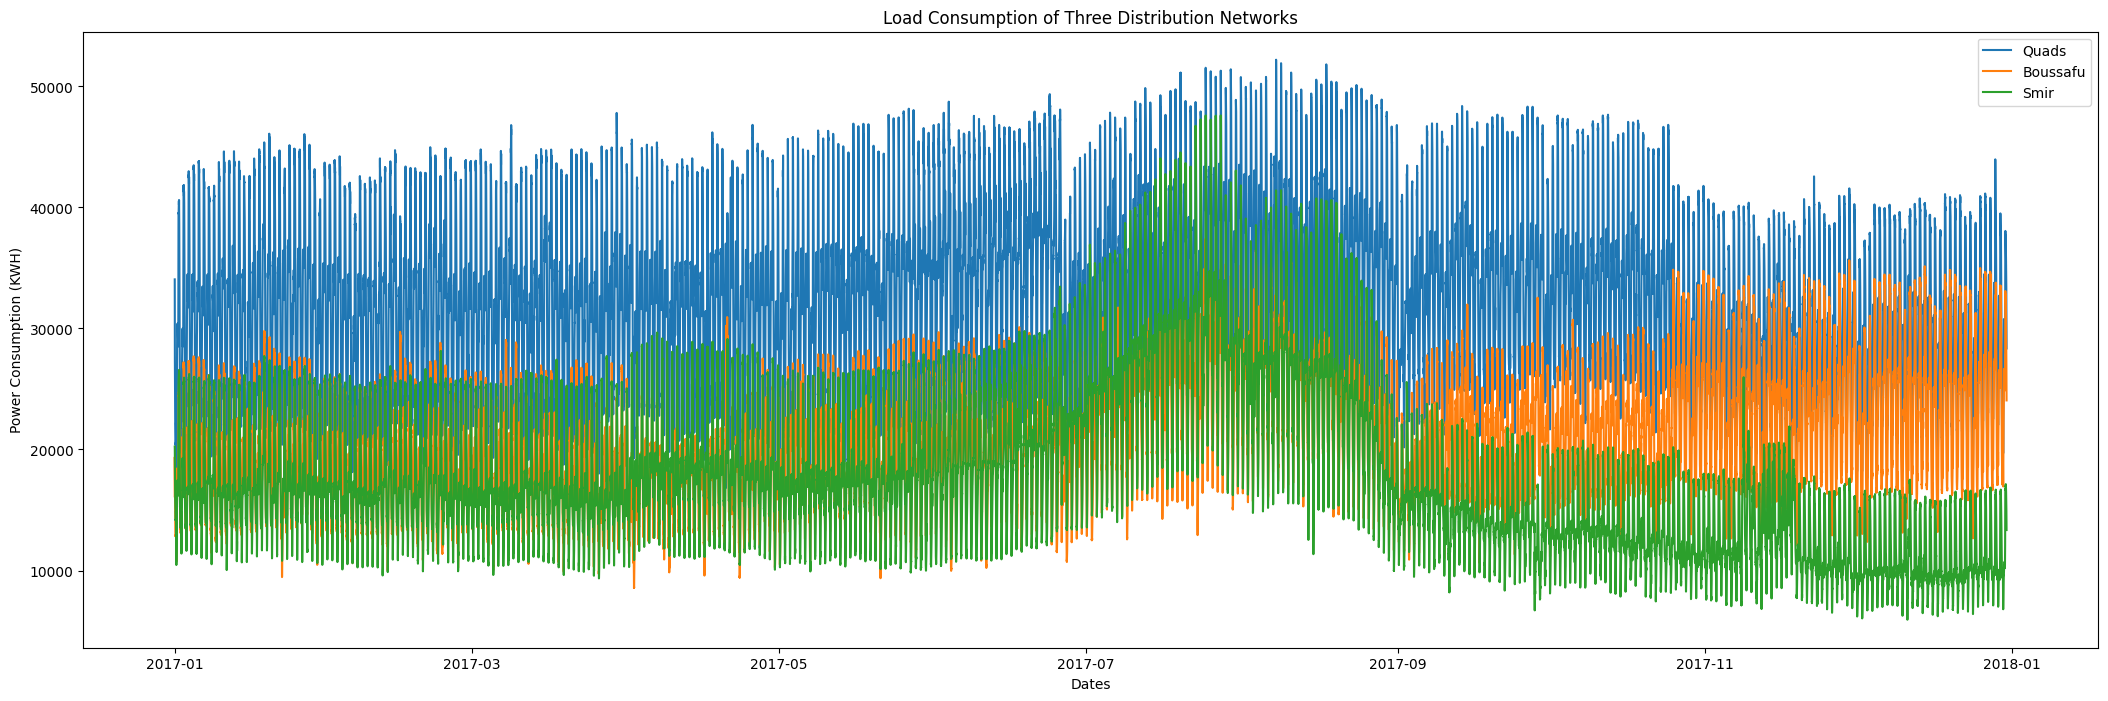

In [ ]:
plt.figure(figsize=(26,8))
plt.plot(df['DateTime'],df['Quads'],label="Quads")
plt.plot(df['DateTime'],df['Boussafu'],label="Boussafu")
plt.plot(df['DateTime'],df['Smir'],label="Smir")
plt.title("Load Consumption of Three Distribution Networks")
plt.xlabel("Dates")
plt.ylabel("Power Consumption (KWH)")
plt.legend()
plt.show()

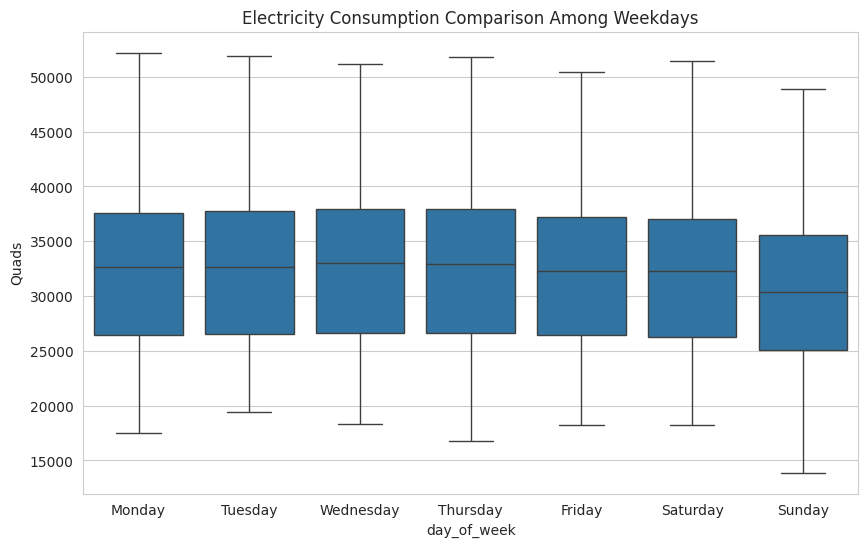

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.boxplot(x='day_of_week', y='Quads', data=df_quads)
plt.title('Electricity Consumption Comparison Among Weekdays')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.show()

#Machine learning models





In [93]:
x=round(df_normalized.shape[0]*0.70)
X=df_normalized.drop(columns=["Quads"])
y=df_normalized["Quads"]
X_train=X.iloc[0:x]
X_test=X.iloc[x:]
y_train=y.iloc[:x]
y_test=y.iloc[x:]

#Feature Importance

In [94]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Plot feature importance
sns.set_style('white')
feature_importance = pd.Series(model.feature_importances_, index=X.columns)

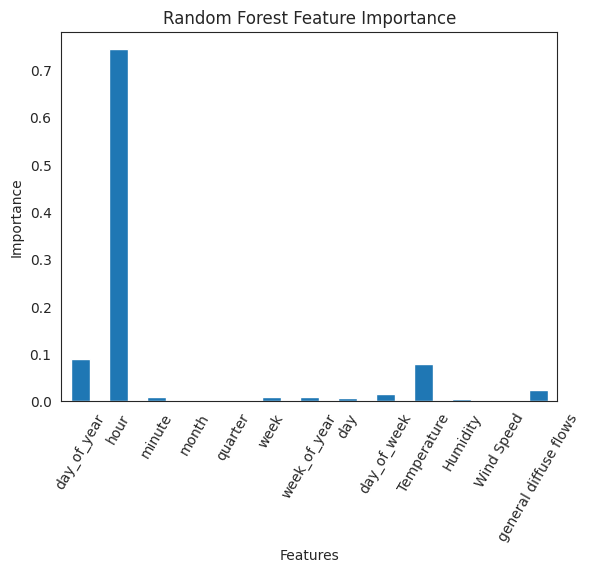

In [95]:
feature_importance.plot(kind='bar')
plt.title('Random Forest Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=60)
#plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
plt.show()

#Random Forest Regressor

In [96]:
rf_model = RandomForestRegressor()

# Define the parameter grid for the grid search
param_grid = {
    'n_estimators': [20, 30],
    'max_features': [1,  7], #['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2]
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best Mean Squared Error: ", -grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_

Best Parameters:  {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 20}
Best Mean Squared Error:  0.05030643422165748


In [98]:
from sklearn.metrics import mean_absolute_error
best_model.fit(X_train,y_train)
# Assuming you have a trained model 'best_model'
# Make predictions on the test set
y_pred_test_rf = best_model.predict(X_test)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred_test_rf)

print("Mean Absolute Error on Test Set: ", mae)

mse = mean_squared_error(y_test, y_pred_test_rf)

# Calculate root mean squared error
rmse = np.sqrt(mse)

print("Root Mean Squared Error on Test Set:", rmse)


Mean Absolute Error on Test Set:  0.10447929319190494
Root Mean Squared Error on Test Set: 0.1239078151763514


#Decision Tree

In [99]:
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4,10],
    'max_features': [1,2,3,6,9]
}

# Decision tree model
dt_model = DecisionTreeRegressor()

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best Mean Squared Error: ", -grid_search.best_score_)
best_model = grid_search.best_estimator_

Best Parameters:  {'max_depth': None, 'max_features': 9, 'min_samples_leaf': 10, 'min_samples_split': 5}
Best Mean Squared Error:  0.0063808723157617025


In [100]:
from sklearn.metrics import mean_absolute_error

best_model.fit(X_train,y_train)
# Make predictions on the test set
y_pred_test_dt = best_model.predict(X_test)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred_test_dt)

print("Mean Absolute Error on Test Set: ", mae)

mse = mean_squared_error(y_test, y_pred_test_dt)

# Calculate root mean squared error
rmse = np.sqrt(mse)

print("Root Mean Squared Error on Test Set:", rmse)


Mean Absolute Error on Test Set:  0.10102824130818078
Root Mean Squared Error on Test Set: 0.1206167295539556


#FFN

In [101]:
X_train=tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test=tf.convert_to_tensor(X_test, dtype=tf.float32)



model = keras.Sequential([
    keras.layers.Dense(10, activation='selu', kernel_initializer='glorot_uniform', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model with SGD, 0.9 momentum, and 100 epochs
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=2)

Epoch 1/100
1011/1011 - 3s - loss: 28.9705 - val_loss: 1.6784 - 3s/epoch - 3ms/step
Epoch 2/100
1011/1011 - 2s - loss: 0.6534 - val_loss: 1.0048 - 2s/epoch - 2ms/step
Epoch 3/100
1011/1011 - 2s - loss: 0.3433 - val_loss: 0.4711 - 2s/epoch - 2ms/step
Epoch 4/100
1011/1011 - 2s - loss: 0.1528 - val_loss: 0.1509 - 2s/epoch - 1ms/step
Epoch 5/100
1011/1011 - 2s - loss: 0.0600 - val_loss: 0.0393 - 2s/epoch - 2ms/step
Epoch 6/100
1011/1011 - 2s - loss: 0.0348 - val_loss: 0.0311 - 2s/epoch - 2ms/step
Epoch 7/100
1011/1011 - 2s - loss: 0.0273 - val_loss: 0.0308 - 2s/epoch - 2ms/step
Epoch 8/100
1011/1011 - 1s - loss: 0.0256 - val_loss: 0.0393 - 1s/epoch - 1ms/step
Epoch 9/100
1011/1011 - 2s - loss: 0.0255 - val_loss: 0.0257 - 2s/epoch - 2ms/step
Epoch 10/100
1011/1011 - 2s - loss: 0.0235 - val_loss: 0.0175 - 2s/epoch - 2ms/step
Epoch 11/100
1011/1011 - 2s - loss: 0.0222 - val_loss: 0.0219 - 2s/epoch - 2ms/step
Epoch 12/100
1011/1011 - 2s - loss: 0.0227 - val_loss: 0.0312 - 2s/epoch - 1ms/step


In [102]:
y_pred_test_ffn = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test_ffn)

print("Mean Absolute Error on test Set: ", mae)

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, y_pred_test_ffn)
rmse = np.sqrt(mse)
print("Mean Squared Error on test Set:", rmse)

482/482 [==============================] - 1s 1ms/step
Mean Absolute Error on test Set:  0.2842636537903618
Mean Squared Error on test Set: 0.3074987880574227


#**Results**

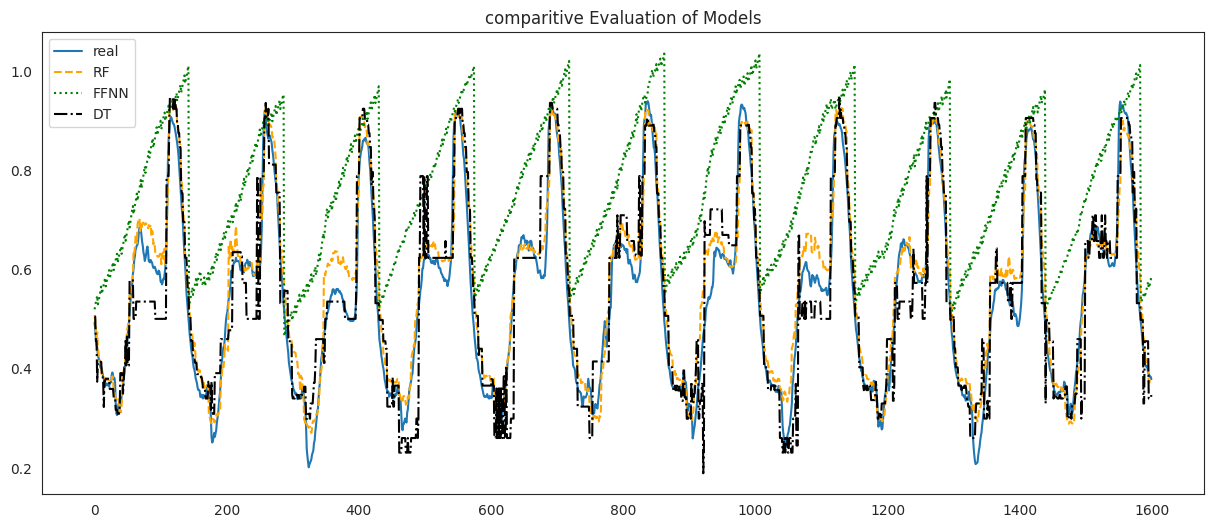

In [106]:
num=range(1600)
plt.figure(figsize=(15,6))
plt.plot(num,y_test[:1600],label="real")
plt.plot(num,y_pred_test_rf[:1600],color="orange",linestyle="--",label="RF")
plt.plot(num,y_pred_test_ffn[:1600],color="green",linestyle="dotted",label="FFNN")
plt.plot(num,y_pred_test_dt[:1600],color="black",linestyle="dashdot",label="DT")
plt.title("comparitive Evaluation of Models")
plt.legend()
plt.show()